# RFM clustering using K-Means and Product, Payment and localisation information


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

rfmsppl = pd.read_csv("./../../../output/rfmsppl.csv")
rfmsppl.drop(columns=["customer_zip_code_prefix"], inplace=True)
rfmsppl = rfmsppl[
    rfmsppl.select_dtypes(exclude=["object", "category", "datetime64"]).columns
]
y = rfmsppl["review_score"]

X_train, X_test, y_train, y_test = train_test_split(
    rfmsppl, y, test_size=0.2, random_state=42, stratify=y
)
rfmsppl = X_test

rfmsppl

,recency,frequency,monetary,nb_orders,days_between_orders,scoring_R,scoring_F,scoring_M,scoring_RFM,review_score,review_completion_percentage,nb_products,scoring_PR,payment_sequential,payment_installments,payment_value_boleto,payment_value_voucher,payment_value_credit_card,payment_value_debit_card
43517,450.0,0.062500,29.50,1.0,0,1,1,1,3,4.0,66.666667,1,5,1.0,1.0,0.000000,0.0,29.500000,0.0
52729,34.0,0.500000,72.07,1.0,0,5,5,2,12,5.0,100.000000,1,6,1.0,1.0,0.000000,0.0,72.070000,0.0
58266,468.0,0.058824,194.91,1.0,0,1,1,4,6,3.0,66.666667,1,6,1.0,1.0,0.000000,0.0,194.910004,0.0
7281,521.0,0.055556,47.95,1.0,0,1,1,1,3,5.0,33.333333,1,1,1.0,4.0,0.000000,0.0,47.950001,0.0
19387,225.0,0.125000,39.84,1.0,0,3,3,1,7,3.0,33.333333,1,2,1.5,1.5,0.000000,0.0,19.920000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,137.0,0.166667,31.03,1.0,0,4,4,1,9,5.0,33.333333,1,7,1.0,1.0,0.000000,0.0,31.030001,0.0
77668,129.0,0.200000,111.42,1.0,0,4,4,3,11,5.0,100.000000,1,8,1.0,2.0,0.000000,0.0,111.419998,0.0
64782,192.0,0.142857,134.34,1.0,0,3,3,4,10,5.0,66.666667,1,7,1.0,1.0,134.339996,0.0,0.000000,0.0
72891,209.0,0.125000,43.09,1.0,0,3,3,1,7,5.0,33.333333,1,8,1.0,1.0,43.090000,0.0,0.000000,0.0


In [72]:
rfmsppl.skew(numeric_only=True)

recency                          0.470574
frequency                        2.792633
monetary                        11.553336
nb_orders                        5.720018
days_between_orders             12.701234
scoring_R                       -0.016459
scoring_F                        0.016779
scoring_M                        0.073505
scoring_RFM                     -0.011834
review_score                    -1.494985
review_completion_percentage     0.838859
nb_products                     21.045840
scoring_PR                      -0.000086
payment_sequential               6.017726
payment_installments             1.399741
payment_value_boleto            25.278086
payment_value_voucher           14.769488
payment_value_credit_card        9.160913
payment_value_debit_card        57.728140
dtype: float64

In [73]:
rfmsppl.review_completion_percentage = rfmsppl.review_completion_percentage.astype(
    "float"
)
rfmsppl.days_between_orders = rfmsppl.days_between_orders.astype("float")

rfmsppl.describe()

,recency,frequency,monetary,nb_orders,days_between_orders,scoring_R,scoring_F,scoring_M,scoring_RFM,review_score,review_completion_percentage,nb_products,scoring_PR,payment_sequential,payment_installments,payment_value_boleto,payment_value_voucher,payment_value_credit_card,payment_value_debit_card
count,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000,17628.000000
mean,235.415305,0.189277,149.954275,1.028024,2.227195,3.014239,2.949115,2.920638,8.883991,4.160359,50.486600,1.346948,5.484854,1.017718,2.483298,29.871023,2.354715,107.890981,2.761062
std,151.385560,0.182860,201.480774,0.165045,21.752632,1.407890,1.377459,1.403259,3.146323,1.268758,22.606204,1.662409,2.856478,0.098995,2.053509,127.965111,17.394526,161.945850,49.573011
min,1.000000,0.041667,10.890000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,0.083333,60.860000,1.000000,0.000000,2.000000,2.000000,2.000000,6.000000,4.000000,33.333333,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,8.800000,0.000000
50%,216.000000,0.125000,102.030000,1.000000,0.000000,3.000000,3.000000,3.000000,9.000000,5.000000,33.333333,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,71.544998,0.000000
75%,341.000000,0.200000,171.872500,1.000000,0.000000,4.000000,4.000000,4.000000,11.000000,5.000000,66.666667,1.000000,8.000000,1.000000,3.000000,0.000000,0.000000,141.630005,0.000000
max,695.000000,2.000000,7274.880000,2.000000,489.000000,5.000000,5.000000,5.000000,15.000000,5.000000,100.000000,105.000000,10.000000,2.000000,9.000000,7274.879883,600.539978,6929.310059,4445.500000


Sadly, and as we may expect the distribution of the satisfaction variables  really skewed.

We will probably have poor performance from KMeans

In [74]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

column_transformer = ColumnTransformer(
    [
        (
            "scaler",
            StandardScaler(),
            make_column_selector(dtype_exclude=["object", "category"]),
        ),
    ]
)

scaled_customers = column_transformer.fit_transform(rfmsppl)

scaled_customers

array([[ 1.41751156, -0.69331937, -0.59786197, ..., -0.13537486,
        -0.48407048, -0.05569846],
       [-1.33051672,  1.69928597, -0.38657031, ..., -0.13537486,
        -0.22119738, -0.05569846],
       [ 1.53641663, -0.7134253 ,  0.22313295, ..., -0.13537486,
         0.53734931, -0.05569846],
       ...,
       [-0.28679444, -0.25386124, -0.07749979, ..., -0.13537486,
        -0.6662353 , -0.05569846],
       [-0.17449521, -0.3515186 , -0.53040945, ..., -0.13537486,
        -0.6662353 , -0.05569846],
       [-0.84168477,  0.05864231,  0.01869077, ..., -0.13537486,
         0.2829978 , -0.05569846]])

### Evaluation of the right number of clusters

How can we evaluate the right number of clusters ? We can use the following methods:

* The elbow method ;
* The silhouette analysis ;
* The Davies Bouldin score ;

Read [This article](https://becominghuman.ai/3-minute-read-to-how-to-find-optimal-number-of-clusters-using-k-means-algorithm-eaa6bdce92cc) for additional information.

#### Elbow Method

Elbow method gives us an idea on what a good _k_ number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids.

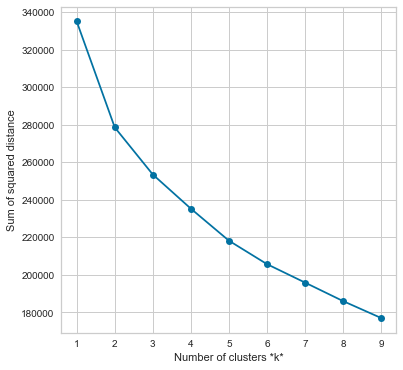

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_customers)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, "-o")
plt.xlabel(r"Number of clusters *k*")
plt.ylabel("Sum of squared distance");

The graph above shows that `k = 4` is a good choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

#### Silhouette Analysis

The **silhouette** analysis is used to evaluate the degree of separation between the clusters.
What we want is all points of a cluster as close as possible and the distance between the clusters as big as possible !

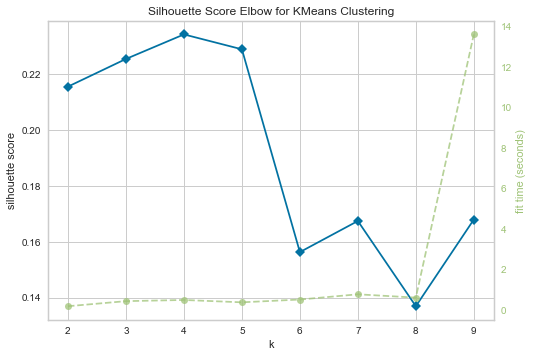

In [76]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2, 10), metric="silhouette", locate_elbow=False
)
# Fit the data and visualize
visualizer.fit(scaled_customers)
visualizer.show();

From the silhouette score, it confirms that `k = 4` is an optimal choice.

#### Davies-Bouldin Index

It is defined as a ratio between the cluster scatter and the cluster’s separation.
Basically a ratio of within-cluster distance and between cluster distances. Aim is to find optimal value in which clusters are less dispersed internally and are farther apart from each other (i.e. distance between two clusters is high).
Hence, a lower value of Davies-Bouldin index will mean that the clustering is better.


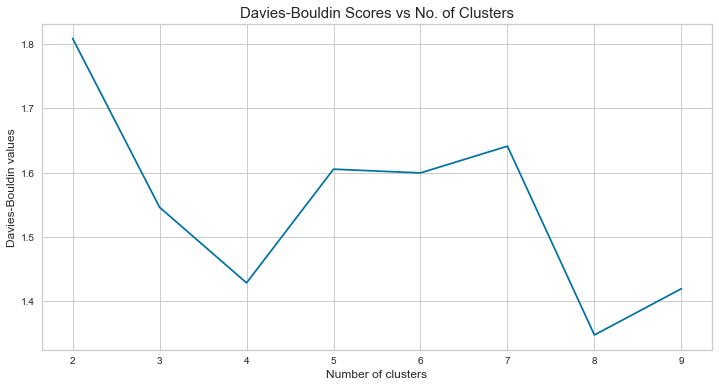

In [77]:
from sklearn.metrics import davies_bouldin_score

db_scores = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_customers)
    labels = kmeans.labels_
    db_scores[k] = davies_bouldin_score(scaled_customers, labels)

# Plotting Davies-Bouldin Scores
plt.figure(figsize=(12, 6))
plt.plot(list(db_scores.keys()), list(db_scores.values()))
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

The analysis of the Davies-Bouldin Scores versus the number of clusters also indicates in favor of **4 clusters** !

Let's plot our clusters and display the silhouette plot for theses :

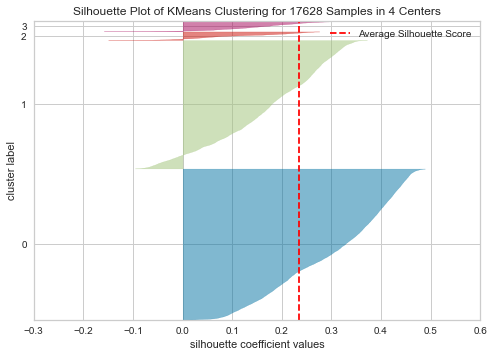

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

kmeans = KMeans(4, random_state=42)

s_visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
s_visualizer.fit(scaled_customers)
s_visualizer.show();

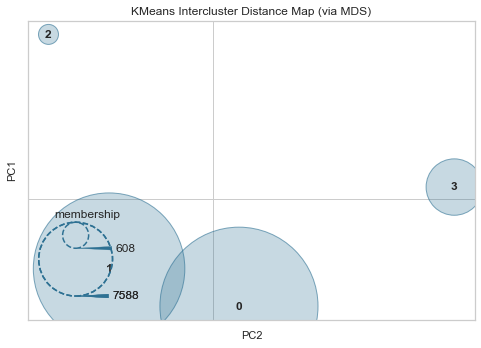

In [79]:
kmeans = KMeans(4, random_state=42)

c_distance_visualizer = InterclusterDistance(kmeans, colors="yellowbrick")
c_distance_visualizer.fit(scaled_customers)
c_distance_visualizer.show();

#### Explanation of the clusters



In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_customers)
clusters = kmeans.labels_

rfmsppl["cluster"] = clusters
rfmsppl.cluster = rfmsppl.cluster.astype("category")
print(rfmsppl["cluster"].value_counts())

0    8932
1    7588
3     608
2     500
Name: cluster, dtype: int64


In [81]:
print("END")

END
